<a href="https://colab.research.google.com/github/RKS8347/testrepo/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def create_RNN(hidden_units,input_shape,dense_units,activation):
  model = Sequential()
  model.add(SimpleRNN(hidden_units,input_shape=input_shape,activation=activation[0]))
  model.add(Dense(units=dense_units,activation=activation[1]))
  model.compile(loss='mean_squared_error',optimizer='adam')
  return model
demo_model = create_RNN(2,(3,1),1,activation=['linear','linear'])

In [ ]:
# input of the weights
wx =  demo_model.get_weights()[0]
# Previous hidden layer weight
wh = demo_model.get_weights()[1]
# biase of the Last RNN
bh = demo_model.get_weights()[2]
# weight of the output
wy = demo_model.get_weights()[3]
# biase of the output
by = demo_model.get_weights()[4]

print('wx =',wx,'wh =',wh,'bh=',bh,'wy=',wy,'by=',by)

wx = [[-0.01760292 -0.7905127 ]] wh = [[-0.80550015  0.5925956 ]
 [ 0.5925956   0.80550015]] bh= [0. 0.] wy= [[0.87252533]
 [0.2238996 ]] by= [0.]


# new concept about RNN

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

# Initialize the Sequential model
model = Sequential()

# Add an Embedding layer
model.add(Embedding(input_dim=10000, output_dim=32))

# Add a SimpleRNN layer
model.add(SimpleRNN(32,return_sequences=True))

# Print the model summary
model.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_7 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size=32

(input_train,y_train),(input_test,y_test) = imdb.load_data(num_words=max_features)
print(len(input_train),'train sequences')
print(len(input_test),'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train,maxlen=maxlen)
input_test = sequence.pad_sequences(input_test,maxlen=maxlen)
print('input_train shape:',input_train.shape)
print('input_test shape:',input_test.shape)

25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [ ]:
from keras.layers import Dense,Embedding,SimpleRNN
from keras.models import Sequential

model = Sequential()
model.add(Embedding(max_features,32))
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(input_train,y_train,epochs=10,batch_size=128,validation_split=0.2)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 121ms/step - acc: 0.5542 - loss: 0.6786 - val_acc: 0.7488 - val_loss: 0.5357
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 125ms/step - acc: 0.7793 - loss: 0.4807 - val_acc: 0.8256 - val_loss: 0.4055
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 131ms/step - acc: 0.8563 - loss: 0.3487 - val_acc: 0.7782 - val_loss: 0.4674
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 130ms/step - acc: 0.8739 - loss: 0.3086 - val_acc: 0.7840 - val_loss: 0.5117
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 19s 123ms/step - acc: 0.8914 - loss: 0.2765 - val_acc: 0.8070 - val_loss: 0.4406
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 19s 115ms/step - acc: 0.9244 - loss: 0.2093 - val_acc: 0.8140 - val_loss: 0.4493
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 133ms/step - acc: 0.9537 - loss: 0.1347 - val_acc: 0.8446 - val_loss: 0.4299
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 38s 117ms/step - acc: 0.9716 - loss: 0.0881 - val_acc: 0.7994 - val_loss: 0.5439
Epoch 9/10
157/157 ━━━━━━━━━━━━━

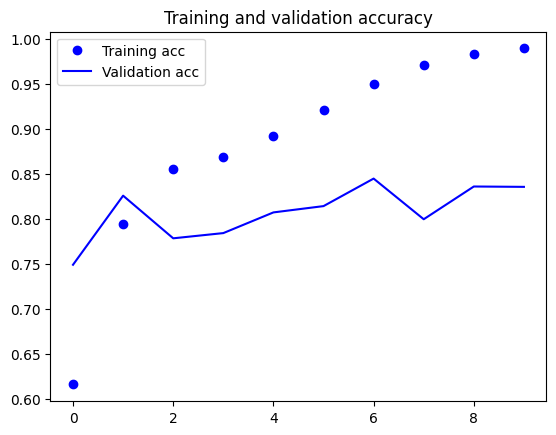

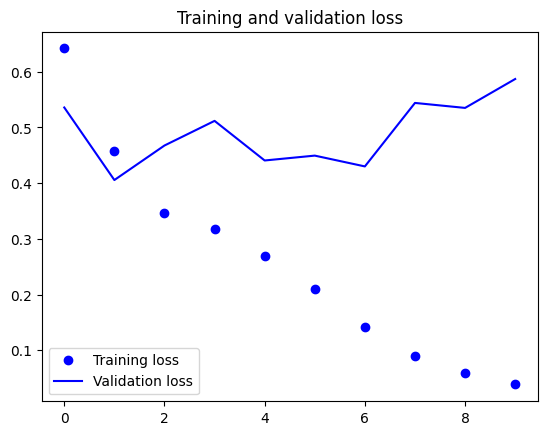

In [ ]:
import matplotlib.pyplot as plt
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()